In [2]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
#This part of the code is written to support the code in the google collab. We chose w=google collab as we both in a team was doing the code.
#Please do not run this part is someone is not working it in google collab. Working in Jupyter does not need this part of code.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List data_batch files in the root.
list = drive.ListFile({'q': "'1IjKG8rbSghPjxtn-2Qt0IVe61pazfIZq' in parents and trashed=false"}).GetList()
for file in list:
  print('title {}, id {}'.format(file['title'], file['id']))
  
#https://https://drive.google.com/drive/folders/1IjKG8rbSghPjxtn-2Qt0IVe61pazfIZq?usp=sharing
#https://drive.google.com/open?id=1PPN3-haEQZFZBizcdhTwG1cFd9vJjCyK

    100% |████████████████████████████████| 993kB 20.4MB/s 
title Copy of Machine_Learning_Assignment1.ipynb, id 13baY3BkSwXW6unHQ0tp9d1teYg3JQ49L
title Case_Study_Assignment2.ipynb, id 1UV-WC2qOIMCxsg2M880sTYVFar0jE0oS
title Advanced_Topics_in_Natural_Language_Processing_Assignment_1.ipynb, id 1vIpWzEbvFIJrf-Per8BKO89AjTpO-x-b
title Copy of Case_Study_Assignment2.ipynb, id 1eIZn-bqMwZEhH2-JF7q9matCNlk1S6oJ
title gold.csv, id 1ozQoK_U-6x2dmJcr35ts3SIbHTJGQ5KP
title mturk.csv, id 1vHEGIeXnPu99RO1gmtiD6sAMKUQN-jUt
title test.csv, id 1d5bCT8RmF8v41kAdGG-AI6H_fqD701-V
title Copy of Machine_Learning_Assignment1.ipynb, id 1se0yTzBgkZLd-bmXL3o-iR5DA4sL2YuY
title Assignment2_MachineLearning.ipynb, id 1IWuvotKG4W_Jn9ODRJ-FoEtl0mP3JP8e
title ANLP_Lab6.ipynb, id 1B6kKZXce8DZIYDDZ5NtYAQIqKsB3lG8n
title Copy of Machine_Learning_Assignment1.ipynb, id 1nTdepDR94I3tGM1kcVMezabMbT-YAnF7
title Logistic_regression_Code.ipynb, id 1cbSUuJtaaeGzmCE8sNMNhxvQC51A0-gm
title Copy of Machine_Learning_Assignment1

In [0]:
#Protim
#This part is entirely for google collab code run. Please do not run this code in case of Jupyter
# Downloading a file into COLAB from Google Drive that have been uploaded in Google Drive
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1mzGyAGQ8u2TiWmGMK165F0mwC6jAQiBC'
downloaded = drive.CreateFile({'id': file_id})

In [0]:
#Protim
#This part is entirely for google collab code run. Please do not run this code in case of Jupyter
#Storing the downloaded object into a File.
downloaded.GetContentFile('batches.meta')

In [0]:
#Koustava
#This code is taken to unpickle the code data block
# This function taken from the CIFAR website
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
#Koustava
#This code is calling the unpickle function alltogether.
unpickle("Enter batch name")

In [0]:

#This code block is the function to load the batch
def loadbatch(batchname):
    batch = unpickle(batchname)
    return batch

In [0]:
#This code block is to load the labels.
def loadlabelnames():
    meta = unpickle('batches.meta')
    return meta[b'label_names']

In [0]:
#This code block has been taken to visualize the images.
import matplotlib.pyplot as plt

def visualise(data, index):
    # MM Jan 2019: Given a CIFAR data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (32x32).

    picture = data[index]
    # Initially, the data is a 1D array of 3072 pixels; reshape it to a 3D array of 3x32x32 pixels
    # Note: after reshaping like this, you could select one colour channel or average them.
    picture.shape = (3,32,32) 
    
    # Plot.imshow requires the RGB to be the third dimension, not the first, so need to rearrange
    picture = picture.transpose([1, 2, 0])
    plt.imshow(picture)
    plt.show()

In [291]:
#Protim
#This code block has been written to take the data and labels from the batch. The same and label data will be used further to train and test the model.
#We have done dataframe operation here.
import pandas as pd
batch1 = loadbatch('data_batch_1')
print("Number of items in the batch is", len(batch1))

# Display all keys, so we can see the ones we want
print('All keys in the batch:', batch1.keys())


lb = batch1[b'labels']
lbdata = batch1[b'data']

print(lbdata[0][:20])
    
#for sublist in range(len(lbdata[0])):
    #print (lbdata[0][sublist])

for i in range(5):
    #data[i] = pd.DataFrame(lbdata[i][:5])
    print(lbdata[i][:1024])
    

    
#data = data.transpose()
#data['class'] = lb[:10]

print(len(lb))

#print(data['class'].shape)



#without_label_data = data.drop('class', axis = 1)
#print(without_label_data)
#3072


Number of items in the batch is 4
All keys in the batch: dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
[ 59  43  50  68  98 119 139 145 149 149 131 125 142 144 137 129 137 134
 124 139]
[ 59  43  50 ... 216 151 123]
[154 126 105 ... 143 143 143]
[255 253 253 ...  78  79  80]
[28 37 38 ... 54 63 72]
[170 168 177 ...  75  71  73]
10000


In [292]:
#Koustava
#This code has been written to define the shpaes of the matrix where the label data will be stored.
#This part needs to run to get the data and label loaded.
#without_label_data = data.drop('class', axis = 1)
import pandas as pd
import numpy as np
#data = data.drop('class', axis = 1)
#print(data)

print(lbdata.shape)
print(type(lbdata))

print(lbdata[0][:10])
print(lbdata[9999][:10])
print(lbdata[0][:1024])


c = np.zeros((lbdata.shape[0],1024))

for i in range(lbdata.shape[0]):
    
    c[i] = np.add(c[i],lbdata[i][:1024])


print(c)


(10000, 3072)
<class 'numpy.ndarray'>
[ 59  43  50  68  98 119 139 145 149 149]
[ 62  61  60  59  94 123 140 105  58  57]
[ 59  43  50 ... 216 151 123]
[[ 59.  43.  50. ... 216. 151. 123.]
 [154. 126. 105. ... 143. 143. 143.]
 [255. 253. 253. ...  78.  79.  80.]
 ...
 [ 71.  60.  74. ...  80.  83.  84.]
 [250. 254. 211. ... 214. 255. 255.]
 [ 62.  61.  60. ... 167. 167. 167.]]


In [0]:
#Koustava
#Here we are defining the label and then transposing it 
label = np.array([lb])
label = label.transpose()

#c.shape

tot = np.append(c, label, axis=1)

#c['class'] = lb[:10]

In [0]:
#Protim
#Here we are defining the label of the aeroplane and the ship which is 0 and 8.
s = tot[tot[:, -1]==0]

aero = tot[tot[:, -1]==0]

ship = tot[tot[:, -1]==8]



In [295]:
#Koustava
#This part is to concatenate the aeroplane and the ship data into one to be impmeneted as classifier.
print(aero.shape)
print(ship.shape)

aero_ship = np.concatenate((aero, ship), axis=0)

#print(aero_ship)

#X_Data = np.delete(aero_ship, 2, axis=1)

#print(X_Data)

print(aero_ship[:,-1])


(1005, 1025)
(1025, 1025)
[0. 0. 0. ... 8. 8. 8.]


In [296]:
#Here are loading the data and label into dataframe.
data = batch1[b'data']
labels = batch1[b'labels']
print ("size of data in this batch:", len(data), ", size of labels:", len(labels))
print (type(data))
print(data.shape)

names = loadlabelnames()

size of data in this batch: 10000 , size of labels: 10000
<class 'numpy.ndarray'>
(10000, 3072)


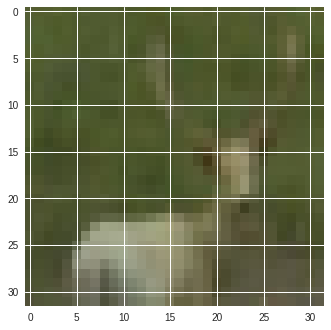

Image 180 : Class is  b'deer'


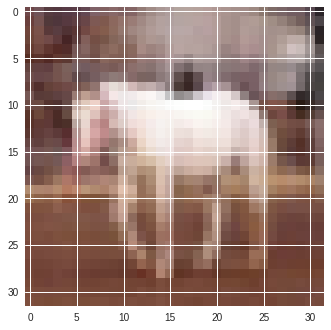

Image 181 : Class is  b'horse'


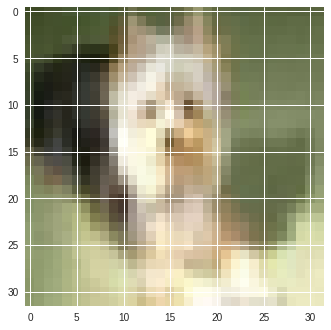

Image 182 : Class is  b'dog'


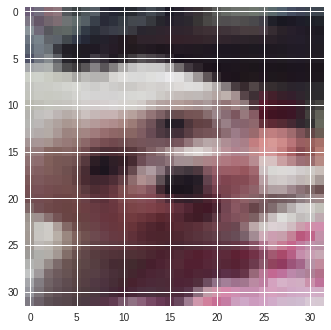

Image 183 : Class is  b'dog'


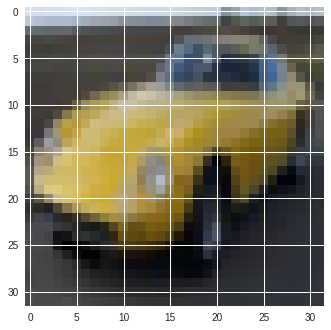

Image 184 : Class is  b'automobile'


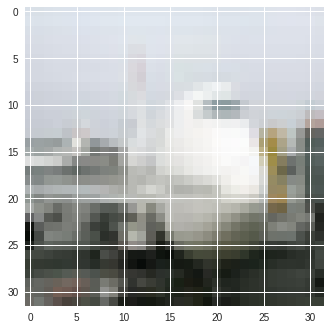

Image 185 : Class is  b'airplane'


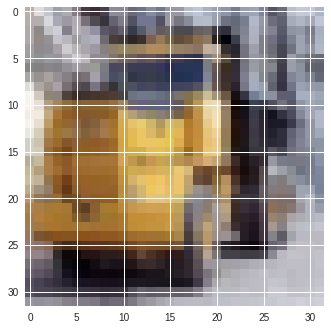

Image 186 : Class is  b'truck'


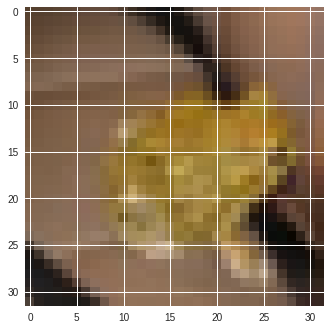

Image 187 : Class is  b'frog'


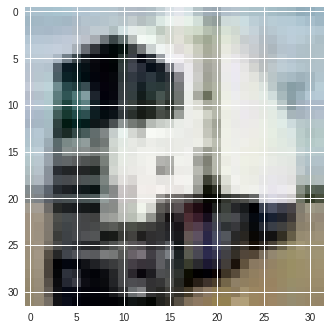

Image 188 : Class is  b'truck'


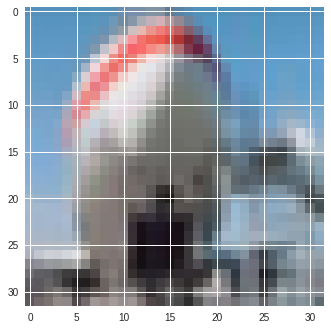

Image 189 : Class is  b'airplane'


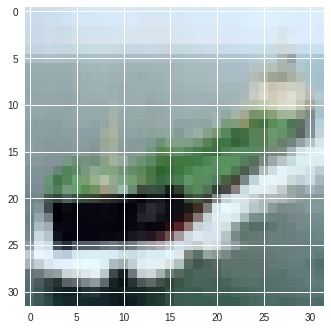

Image 190 : Class is  b'ship'


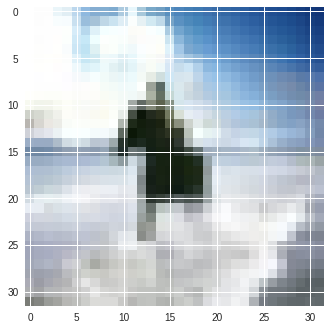

Image 191 : Class is  b'horse'


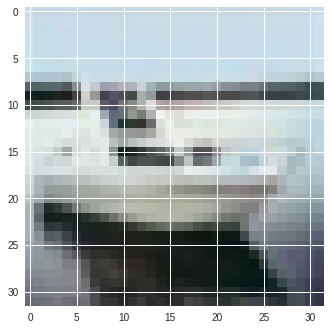

Image 192 : Class is  b'ship'


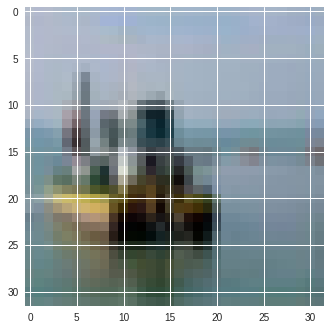

Image 193 : Class is  b'ship'


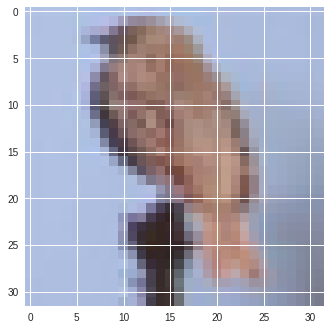

Image 194 : Class is  b'bird'


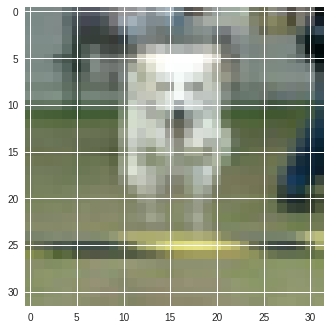

Image 195 : Class is  b'dog'


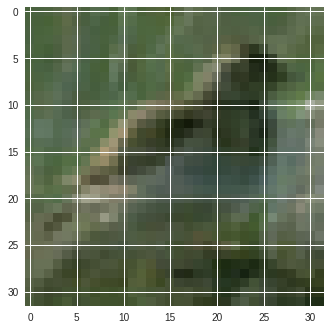

Image 196 : Class is  b'bird'


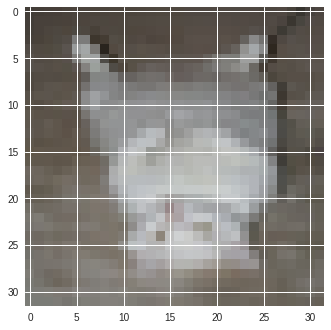

Image 197 : Class is  b'cat'


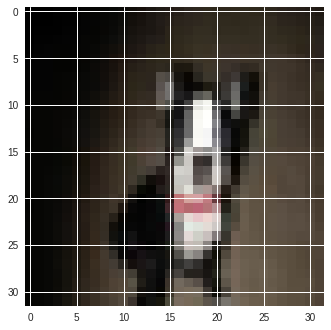

Image 198 : Class is  b'dog'


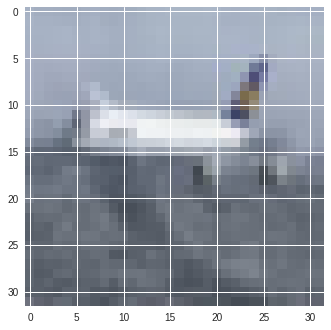

Image 199 : Class is  b'airplane'


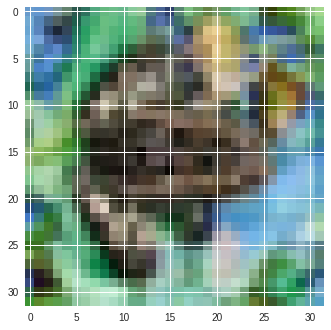

Image 200 : Class is  b'frog'


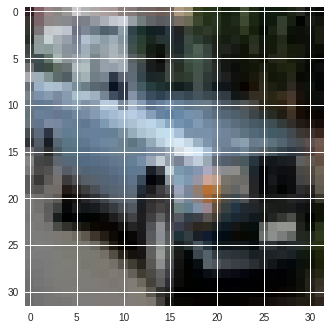

Image 201 : Class is  b'automobile'


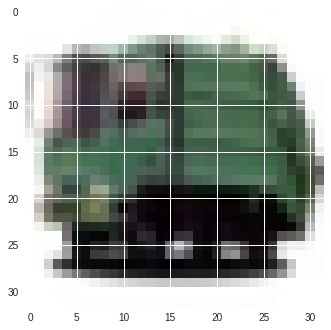

Image 202 : Class is  b'truck'


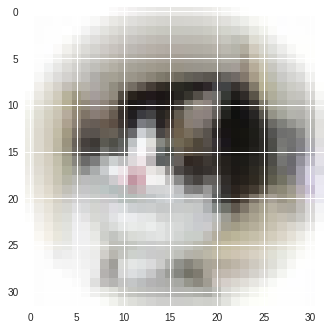

Image 203 : Class is  b'cat'


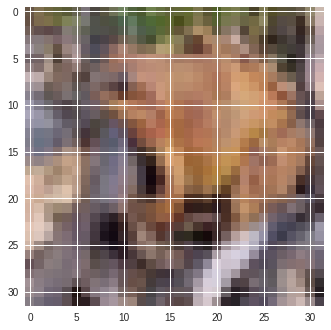

Image 204 : Class is  b'frog'


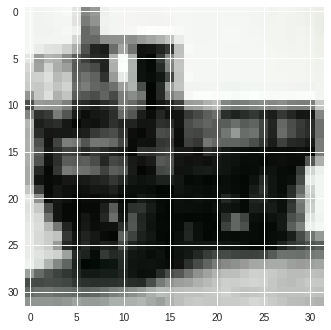

Image 205 : Class is  b'truck'


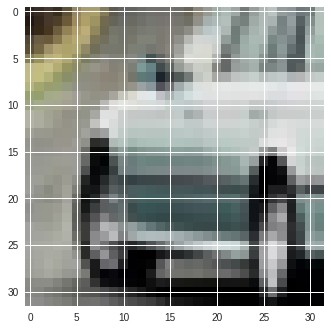

Image 206 : Class is  b'automobile'


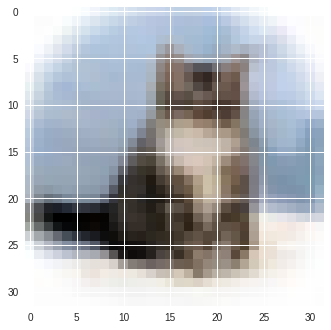

Image 207 : Class is  b'cat'


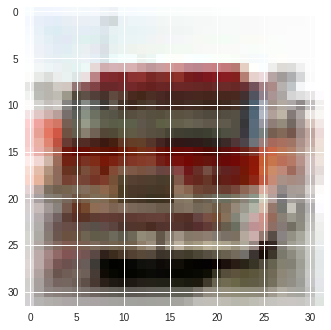

Image 208 : Class is  b'truck'


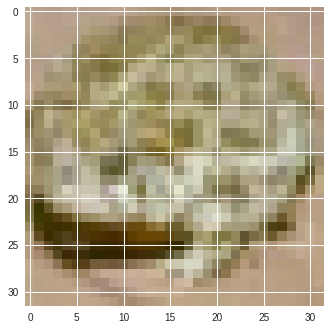

Image 209 : Class is  b'frog'


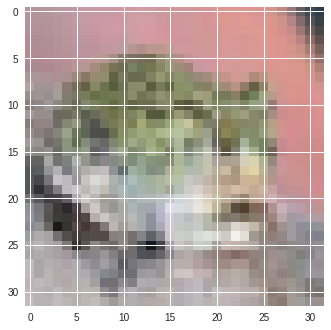

Image 210 : Class is  b'frog'


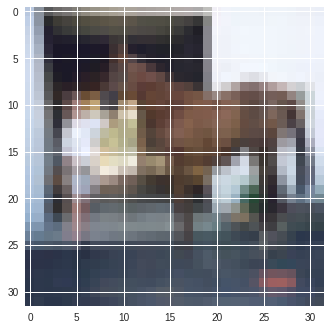

Image 211 : Class is  b'horse'


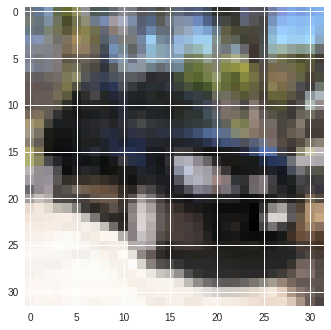

Image 212 : Class is  b'automobile'


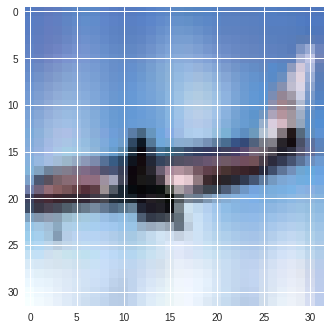

Image 213 : Class is  b'airplane'


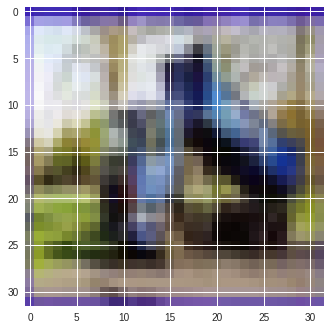

Image 214 : Class is  b'truck'


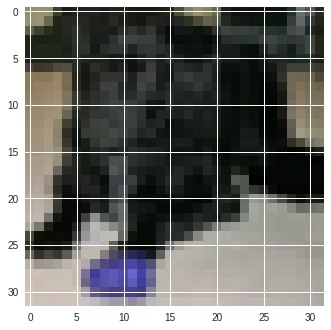

Image 215 : Class is  b'dog'


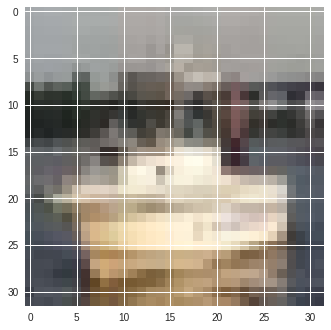

Image 216 : Class is  b'ship'


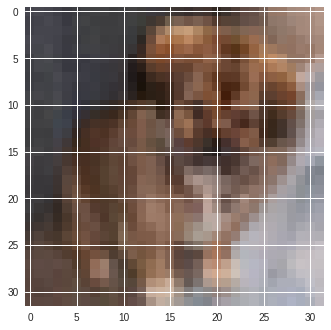

Image 217 : Class is  b'dog'


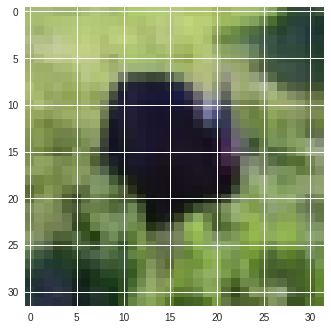

Image 218 : Class is  b'bird'


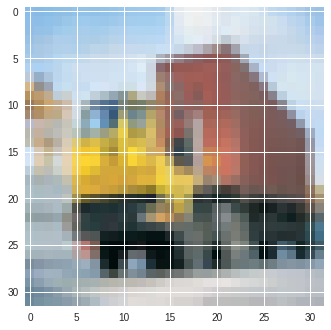

Image 219 : Class is  b'truck'


In [19]:
# Display a few images from the batch
for i in range (180,220):
   visualise(data, i)
   print("Image", i,": Class is ", names[labels[i]])

In [0]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score

# Display plots inline and change default figure size
%matplotlib inline

In [60]:
#This part is to upload file in google collab. This needs not to be run in jupyter.
from google.colab import files
uploaded = files.upload()

Saving circles500.csv to circles500.csv


###################For Circle Dataset###################

In [61]:
#Protim
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("circles500.csv")

# The y values are those labelled 'Class': extract their values
y = np.array(df[['Class']])

# The x values are all other columns
X = df.drop(df.columns[len(df.columns)-1], axis=1).values


print(X.shape[0])
print(y.shape)


500
(500, 1)


In [0]:
#Koustava
#This part has taken from scikit learning package to split the data into 66 percent training and 33 part testing.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

#print(y_train)

In [0]:
#Koustava
#This is the function derive the sigmoid activation function.
#We have passed a flag which whether the function needs to return derivative form result or not.
def sig(x , deriv = False):
  if (deriv == True):
    return x * (1-x)
  return 1/ (1 + np.exp(-x))

In [101]:
#Protim
#This part is to initialize the weights of the layers and the baises.
#We have taken the help of random initialization with some constraints.
#We have also defined the number of layers here.
#No. of columns
features_length=X_train.shape[1]
#No. of nodes at hidden layer
neuron_at_hidden_layer= 3
#No. of nodes at output layer
neuron_at_outer_layer= 1


#initialise the weights
theta_weight_1stLayer = 2 * np.random.random((features_length,neuron_at_hidden_layer)) - 1   #No. of features and 1 output so choose the matrix as to no. of input 
                                                                               #nodes and how many output nodes
theta_weight_2ndLayer = 2 * np.random.random((neuron_at_hidden_layer,neuron_at_outer_layer)) - 1

bias_weight_1stLayer = 2 * np.random.random((1, neuron_at_hidden_layer)) - 1

bias_weight_2ndLayer = 2 * np.random.random((1, neuron_at_outer_layer)) - 1#np.zeros((1, neuron_at_outer_layer))


[[0.82902802]]


In [102]:
#Koustava
#This part is being written to implement the feed forward algorithm and backprop algorithm.
#We have also taken help of python time function to node down the time for the same.
#Here we have defined the earning rate as 0.01. If the systems converges before that this parameter needs to be changed.
import time
start = time.time()
for j in range(5000):#number of iteration which needs to be changed if performance is low.
  
  #Feed Forward
  Layer1 = X_train
  Layer2 = sig(np.dot(Layer1 , theta_weight_1stLayer) + bias_weight_1stLayer)
  Layer3 = sig(np.dot(Layer2 , theta_weight_2ndLayer) + bias_weight_2ndLayer)
  
  
  #BackPropagation
  Layer3_error = y_train - Layer3
  if ( j % 1000) == 0:
    print("Error :" + str(np.mean(np.abs(Layer3_error))))  #get the absolute mean error of outer layer and print it as string at every 10000 steps
    
  #We need to calculate Delta for Layer 2 and also Delta for Layer 1
  
  Layer3_delta = Layer3_error * sig(Layer3, deriv = True)
  
  Layer2_error = Layer3_delta.dot(theta_weight_2ndLayer.T)
  
  Layer2_delta = Layer2_error * sig(Layer2, deriv = True)
  
  #Use these deltas to update our weights and bias
  theta_weight_2ndLayer = theta_weight_2ndLayer + (Layer2.T.dot(Layer3_delta) * 0.01)
  theta_weight_1stLayer = theta_weight_1stLayer +(Layer1.T.dot(Layer2_delta) * 0.01)
  
  bias_weight_2ndLayer=bias_weight_2ndLayer + np.sum(Layer3_delta,axis=0) * 0.01
  bias_weight_1stLayer=bias_weight_1stLayer + np.sum(Layer2_delta,axis=0) * 0.01
  
stop = time.time()   
duration = stop-start
print(duration)  
print("Output after our training :" )

Error :0.5121985457398123
Error :0.49136277050200294
Error :0.31106591189379973
Error :0.11136018526557782
Error :0.08556600666577475
0.5714328289031982
Output after our training :


In [103]:
#Protim
#this part has been written to pass the test data into feed forward algorithm with the new updated weight and bias.
test_weight_1st_Layer = sig(np.dot(X_test, theta_weight_1stLayer)  +  bias_weight_1stLayer)
test_weight_2nd_Layer = sig(np.dot(test_weight_1st_Layer, theta_weight_2ndLayer)  + bias_weight_2ndLayer )


(165, 1)


In [104]:
#Protim
#We have implemented this accuracy function to calculate the accuracy.
#We have taken the y-test data to compare the values.
correct = 0
pred_list = []
for i in range (len(y_test)):
  if (test_weight_2nd_Layer[i] > 0.5):
    pred = 1 #Change this label to 8 in case of image classification
  else:
    pred = 0
  
  
  if pred == y_test[i]:
    correct = correct + 1
  
  pred_list.append(pred)
  
  
print("Test Accuracy   :" , ((correct/len(y_test))* 100) , '%' )

Test Accuracy   : 99.39393939393939 %


In [109]:
#Koustava
#This part we have implemented to get all the validation details of the model.
#We have taken help of scikit learning liabrary.
import numpy as np
#classification report
print(classification_report(y_test, pred_list))
#confusion matrix
confmat = confusion_matrix(y_test, pred_list)
print("The Confusion matrix is: -")
print(confmat)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.99      1.00      0.99        94

   micro avg       0.99      0.99      0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165

The Confusion matrix is: -
[[70  1]
 [ 0 94]]


##This part is to work with the image classification data##

In [0]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# Display plots inline and change default figure size
%matplotlib inline

In [0]:
#Koustava
#this part is to load the x and y data from the aership dataframe. We have taken the X data by ommiting the last column label.
#y has been taken as the last column
X = aero_ship[:,:-1]
m = X.shape[0]
y = np.ones((m,1))
y = np.reshape(aero_ship[:,-1],(m,1))

In [0]:
#Koustava
#As the label is 8 and 0 to binaries to 1 and 0 we have written this code
for i in range(len(y)):
  if(y[i]==8):
    y[i]=1

In [0]:
#Koustava
#This par tis to normalize the data
X=X/255

In [0]:
#Koustava
#This part has taken from scikit learning package to split the data into 66 percent training and 33 part testing.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [0]:
#Protim
#This is the function derive the sigmoid activation function.
#We have passed a flag which whether the function needs to return derivative form result or not.
def sig(x , deriv = False):
  if (deriv == True):
    return x * (1-x)
  return 1/ (1 + np.exp(-x))

In [304]:
#Koustava
#This part is to initialize the weights of the layers and the baises.
#We have taken the help of random initialization with some constraints.
#We have also defined the number of layers here.
#No. of columns
#No. of columns
features_length=X_train.shape[1]
#No. of nodes at hidden layer
neuron_at_hidden_layer= 50
#No. of nodes at output layer
neuron_at_outer_layer= 1


#print("* iris types:", df["Name"].unique(), sep="\n")
#initialise the weights
theta_weight_1stLayer = 2 * np.random.random((features_length,neuron_at_hidden_layer)) - 1   #No. of features and 1 output so choose the matrix as to no. of input 
                                                                               #nodes and how many output nodes
theta_weight_2ndLayer = 2 * np.random.random((neuron_at_hidden_layer,neuron_at_outer_layer)) - 1

bias_weight_1stLayer = 2 * np.random.random((1, neuron_at_hidden_layer)) - 1

bias_weight_2ndLayer = 2 * np.random.random((1, neuron_at_outer_layer)) - 1#np.zeros((1, neuron_at_outer_layer))

print(bias_weight_2ndLayer)

[[-0.24559821]]


In [247]:
#Protim
#This part is being written to implement the feed forward algorithm and backprop algorithm.
#We have also taken help of python time function to node down the time for the same.
#Here we have defined the earning rate as 0.01. If the systems converges before that this parameter needs to be changed.
import time
start = time.time()
for j in range(10000):
  
  #Feed Forward
  Layer1 = X_train
  Layer2 = sig(np.dot(Layer1 , theta_weight_1stLayer) + bias_weight_1stLayer)
  Layer3 = sig(np.dot(Layer2 , theta_weight_2ndLayer) + bias_weight_2ndLayer)
  
  #BackPropagation
  Layer3_error = y_train - Layer3
  if ( j % 1000) == 0:
    print("Error :" + str(np.mean(np.abs(Layer3_error))))  #get the absolute mean error of outer layer and print it as string at every 10000 steps
    
  #We need to calculate Delta for Layer 2 and also Delta for Layer 1
  
  Layer3_delta = Layer3_error * sig(Layer3, deriv = True)
  
  Layer2_error = Layer3_delta.dot(theta_weight_2ndLayer.T)
  
  Layer2_delta = Layer2_error * sig(Layer2, deriv = True)
  
  #Use these deltas to update our weights
  theta_weight_2ndLayer = theta_weight_2ndLayer + (Layer2.T.dot(Layer3_delta) * 0.001)
  theta_weight_1stLayer = theta_weight_1stLayer +(Layer1.T.dot(Layer2_delta) * 0.001)
  
  bias_weight_2ndLayer=bias_weight_2ndLayer + np.sum(Layer3_delta,axis=0) * 0.001
  bias_weight_1stLayer=bias_weight_1stLayer + np.sum(Layer2_delta,axis=0) * 0.001
  
stop = time.time()   
duration = stop-start
print(duration)  
print("Output after our training :" )

Error :0.4993594064141146
Error :0.4985469100525003
Error :0.49683561700456136
Error :0.4948310378386863
Error :0.4923888961885657
Error :0.48940861833288124
Error :0.4858588538700824
Error :0.48179671432060506
Error :0.47736231968938847
Error :0.47274377842900156
201.10261583328247
Output after our training :


In [248]:
#Protim
#this part has been written to pass the test data into feed forward algorithm with the new updated weight and bias.
test_weight_1st_Layer = sig(np.dot(X_test, theta_weight_1stLayer)  +  bias_weight_1stLayer)
test_weight_2nd_Layer = sig(np.dot(test_weight_1st_Layer, theta_weight_2ndLayer)  + bias_weight_2ndLayer )


print(test_weight_2nd_Layer.shape)

(670, 1)


In [251]:
#Koustava
#We have implemented this accuracy function to calculate the accuracy.
#We have taken the y-test data to compare the values.
correct = 0
pred_list = []
for i in range (len(y_test)):
  if (test_weight_2nd_Layer[i] > 0.5):
    pred = 1 #Change this label to 8 in case of image classification
  else:
    pred = 0
  
  
  if pred == y_test[i]:
    correct = correct + 1
  
  pred_list.append(pred)
  
  
print("Test Accuracy of image model of 1-hidden layer   :" , ((correct/len(y_test))* 100) , '%' )

Test Accuracy of image model of 1-hidden layer   : 63.28358208955224 %


In [250]:
#Koustava
#This part we have implemented to get all the validation details of the model.
#We have taken help of scikit learning liabrary.
import numpy as np
#classification report
print(classification_report(y_test, pred_list))
#confusion matrix
confmat = confusion_matrix(y_test, pred_list)
print("The Confusion matrix is: -")
print(confmat)

              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60       326
         1.0       0.63      0.69      0.66       344

   micro avg       0.63      0.63      0.63       670
   macro avg       0.63      0.63      0.63       670
weighted avg       0.63      0.63      0.63       670

The Confusion matrix is: -
[[187 139]
 [107 237]]


Part4 implmentation-Koustava

In [0]:
#This code has been written to implement the tanh activation function.
#There is a flag set where it is mentioned whether the derivative of tanh needs to be returned or not.
import numpy as np
def tan(x , deriv = False):
  if (deriv == True):
    return (1 - (x ** 2))
  return np.tanh(x)

In [306]:
#This part is to initialize the weights of the layers and the baises.
#We have taken the help of random initialization with some constraints.
#We have also defined the number of layers here.
#No. of columns
features_length=X_train.shape[1]
#No. of nodes at hidden layer
neuron_at_hidden_layer= 50
#No. of nodes at output layer
neuron_at_outer_layer= 1


#print("* iris types:", df["Name"].unique(), sep="\n")
#initialise the weights
theta_weight_1stLayer = 2 * np.random.random((features_length,neuron_at_hidden_layer)) - 1   #No. of features and 1 output so choose the matrix as to no. of input 
                                                                               #nodes and how many output nodes
  
theta_weight_2nd_layer =  2 * np.random.random((neuron_at_hidden_layer,neuron_at_hidden_layer)) - 1

theta_weight_3rd_layer =  2 * np.random.random((neuron_at_hidden_layer,neuron_at_hidden_layer)) - 1

theta_weight_outputLayer = 2 * np.random.random((neuron_at_hidden_layer,neuron_at_outer_layer)) - 1

bias_weight_1stLayer = 2 * np.random.random((1, neuron_at_hidden_layer)) - 1

bias_weight_2ndLayer = 2 * np.random.random((1, neuron_at_hidden_layer)) - 1

bias_weight_3rdLayer = 2 * np.random.random((1, neuron_at_hidden_layer)) - 1

bias_weight_outputLayer = 2 * np.random.random((1, neuron_at_outer_layer)) - 1#np.zeros((1, neuron_at_outer_layer))

print(bias_weight_2ndLayer.shape)

(1, 50)


In [274]:
#This part is being written to implement the feed forward algorithm and backprop algorithm.
#We have also taken help of python time function to node down the time for the same.
#Here we have defined the earning rate as 0.01. If the systems converges before that this parameter needs to be changed.
#I have also implemented mini batch gradient descent for which I have implemented the variables
import time
p = 0.001
start = time.time()
for i in range(0, 5000):
  iterations = 10
  offset = 0 # offset variables
  end = 136  # decides the limit of minibatch size

  for j in range(iterations): #defining the iterations.
    xx = X_train[offset:end] # defining the minibatch train input
    yy = y_train[offset : end]# defining the minibatch train input
    
  #Feed Forward
    Layer1 = xx
    Layer2 = tan(np.dot(Layer1 , theta_weight_1stLayer) + bias_weight_1stLayer)
    Layer3 = tan(np.dot(Layer2 , theta_weight_2nd_layer) + bias_weight_2ndLayer)
    Layer4 = tan(np.dot(Layer3 , theta_weight_3rd_layer) + bias_weight_3rdLayer)
    Layer5 = tan(np.dot(Layer4 , theta_weight_outputLayer) + bias_weight_outputLayer)
  
  #BackPropagation
    Layer5_error = yy - Layer5
    #print(Layer5_error)
    if ( j % 1000) == 0:
      print("Error :" + str(np.mean(np.abs(Layer5_error))))  #get the absolute mean error of outer layer and print it as string at every 10000 steps
    
   #We need to calculate Delta for Layer 2 and also Delta for Layer 1
  
    Layer5_delta = Layer5_error * tan(Layer5, deriv = True)
    #print(Layer5_delta.shape)
    
    Layer4_error = Layer5_delta.dot(theta_weight_outputLayer.T)
    
  
    Layer4_delta = Layer4_error * tan(Layer4, deriv = True)
    #print(Layer4_delta.shape)
  
    Layer3_error = Layer4_delta.dot(theta_weight_3rd_layer.T)
    
  
    Layer3_delta = Layer3_error * tan(Layer3, deriv = True)
    #print(Layer3_delta.shape)
  
    Layer2_error = Layer3_delta.dot(theta_weight_2nd_layer.T)
    
  
    Layer2_delta = Layer2_error * tan(Layer2, deriv = True)
    #print(Layer2_delta.shape)
  
  #Use these deltas to update our weights
    #theta_weight_outputLayer = theta_weight_outputLayer + (Layer3.T.dot(Layer4_delta) * 0.1)
    
    theta_weight_outputLayer = theta_weight_outputLayer + (Layer4.T.dot(Layer5_delta) * p )
    
    theta_weight_3rd_layer = theta_weight_3rd_layer + (Layer3.T.dot(Layer4_delta) * p)
  
    theta_weight_2nd_layer = theta_weight_2nd_layer + (Layer2.T.dot(Layer3_delta) * p)
  
    theta_weight_1stLayer = theta_weight_1stLayer + (Layer1.T.dot(Layer2_delta) * p)
  
  
    #bias_weight_outputLayer = bias_weight_outputLayer + np.sum(Layer4_delta,axis=0) * 0.1
    
    
    
    bias_weight_outputLayer = bias_weight_outputLayer + np.sum(Layer5_delta,axis=0) * p
    
    bias_weight_3rdLayer = bias_weight_3rdLayer + np.sum(Layer4_delta,axis=0) * p
  
    bias_weight_2ndLayer=bias_weight_2ndLayer + np.sum(Layer3_delta,axis=0) * p
  
    bias_weight_1stLayer=bias_weight_1stLayer + np.sum(Layer2_delta,axis=0) * p
    offset = offset + 136 #To increase the offset value
    end = end + 136#To increase the end value
stop = time.time()   
duration = stop-start
print(duration)
  
#print("Output after our training :", theta_weight_2ndLayer)

Error :0.832128512064414
Error :0.5386533374813003
Error :0.5315010310061017
Error :0.5252484878533261
Error :0.5175133801289715
Error :0.5098601116160859
Error :0.4598823876179367
Error :0.45445863455312585
Error :0.4412610669537217
Error :0.4445425657376762
Error :0.456665712633952
Error :0.4691900548309826
Error :0.4209428342514203
Error :0.4272716765835277
Error :0.43618967751701193
Error :0.428744948859737
Error :0.4279052042376562
Error :0.3960188305349279
Error :0.44765488097049627
Error :0.39967441270375564
Error :0.4093113289797532
Error :0.4295679297683902
Error :0.3853155909625925
Error :0.3921488663933329
Error :0.402294126276578
Error :0.38307525832326805
Error :0.4435570141818965
Error :0.38262591714385485
Error :0.4158649725740357
Error :0.38226691862665446
Error :0.3769392532032459
Error :0.37588088001714826
Error :0.4105222000053695
Error :0.394878530150273
Error :0.385744280930703
Error :0.3998514130143586
Error :0.37457965879771427
Error :0.39038050225060084
Error :0

In [276]:
#this part has been written to pass the test data into feed forward algorithm with the new updated weight and bias.
test_weight_1st_Layer = tan(np.dot(X_test, theta_weight_1stLayer)  +  bias_weight_1stLayer)
test_weight_2nd_Layer = tan(np.dot(test_weight_1st_Layer, theta_weight_2nd_layer)  + bias_weight_2ndLayer )
test_weight_3rd_Layer = tan(np.dot(test_weight_2nd_Layer, theta_weight_3rd_layer)  + bias_weight_3rdLayer )
test_weight_output_Layer = tan(np.dot(test_weight_3rd_Layer, theta_weight_outputLayer)  + bias_weight_outputLayer )


print(test_weight_output_Layer.shape)

(670, 1)


In [277]:
#We have implemented this accuracy function to calculate the accuracy.
#We have taken the y-test data to compare the values.
correct = 0
pred_list = []
for i in range (len(y_test)):
  if (test_weight_output_Layer[i] > 0.5):
    pred = 1 #Change this to 1 for moon dataset
  else:
    pred = 0
  
  
  if pred == y_test[i]:
    correct = correct + 1
  
  pred_list.append(pred)
  
  
print("Test Accuracy for 3-hidden layer model   :" , ((correct/len(y_test))* 100) , '%' )


Test Accuracy for 3-hidden layer model   : 60.74626865671642 %


In [278]:
#This part we have implemented to get all the validation details of the model.
#We have taken help of scikit learning liabrary.
import numpy as np
#classification report
print(classification_report(y_test, pred_list))
#confusion matrix
confmat = confusion_matrix(y_test, pred_list)
print("The Confusion matrix is: -")
print(confmat)

              precision    recall  f1-score   support

         0.0       0.63      0.47      0.54       326
         1.0       0.59      0.74      0.66       344

   micro avg       0.61      0.61      0.61       670
   macro avg       0.61      0.60      0.60       670
weighted avg       0.61      0.61      0.60       670

The Confusion matrix is: -
[[153 173]
 [ 90 254]]


#############PROTIM PART 4 IMPLEMENTATION

In [0]:
# alternative activation function which has been written for the relu activation function.
def ReLU(x , deriv = False):
  if (deriv == True):
    return 1. * (x > 0)
  return np.maximum(x, 0)

In [318]:
#This part is to initialize the weights of the layers and the baises.
#We have taken the help of random initialization with some constraints.
#We have also defined the number of layers here.
#No. of columns
features_length=X_train.shape[1]
#No. of nodes at hidden layer 1
neuron_at_hidden_layer1= 50
#No. of nodes at hidden layer 2
neuron_at_hidden_layer2= 20
#No. of nodes at output layer
neuron_at_outer_layer= 1


#print("* iris types:", df["Name"].unique(), sep="\n")
#initialise the weights
theta_weight_1stLayer =  2 * np.random.random((features_length,neuron_at_hidden_layer1)) - 1    #No. of features and 1 output so choose the matrix as to no. of input 
                                                                               #nodes and how many output nodes
#uniform(low=0, high=1, size=(3, 3))
theta_weight_2ndLayer = 2 * np.random.random((neuron_at_hidden_layer1,neuron_at_hidden_layer2)) -1

theta_weight_3rdLayer =  2 * np.random.random((neuron_at_hidden_layer2,neuron_at_outer_layer)) -1

bias_weight_1stLayer =   2 * np.random.random((1, neuron_at_hidden_layer1)) - 1

bias_weight_2ndLayer =  2 * np.random.random((1, neuron_at_hidden_layer2)) - 1

bias_weight_3rdLayer = 2 * np.random.random((1, neuron_at_outer_layer)) - 1 #np.zeros((1, neuron_at_outer_layer))

print(bias_weight_3rdLayer)

[[0.9824006]]


In [319]:
#This part is being written to implement the feed forward algorithm and backprop algorithm.
#We have also taken help of python time function to node down the time for the same.
#Here we have defined the earning rate as 0.01. If the systems converges before that this parameter needs to be changed.
#The activation function has been changed to ReLU  to be implemented
import time
start = time.time()

for j in range(10000):
  
  
  Layer1 = X_train
  Layer2 = ReLU(np.dot(Layer1 , theta_weight_1stLayer) + bias_weight_1stLayer)
  Layer3 = ReLU(np.dot(Layer2 , theta_weight_2ndLayer) + bias_weight_2ndLayer)
  Layer4 = sig(np.dot(Layer3 , theta_weight_3rdLayer) + bias_weight_3rdLayer)
  
  
  #BackPropagation
  Layer4_error = y_train - Layer4
  if ( j % 1000) == 0:
    print("Error :" + str(np.mean(np.abs(Layer4_error))))  #get the absolute mean error of outer layer and print it as string at every 10000 steps
    
  Layer4_delta = Layer4_error * sig(Layer4, deriv = True)
  
  Layer3_error = Layer4_delta.dot(theta_weight_3rdLayer.T)
  
  Layer3_delta = Layer3_error * ReLU(Layer3, deriv = True)
  
  Layer2_error = Layer3_delta.dot(theta_weight_2ndLayer.T)
  
  Layer2_delta = Layer2_error * ReLU(Layer2, deriv = True)
  
  #Use these deltas to update our weights
  theta_weight_3rdLayer = theta_weight_3rdLayer + (Layer3.T.dot(Layer4_delta) * 0.001)
  theta_weight_2ndLayer = theta_weight_2ndLayer + (Layer2.T.dot(Layer3_delta) * 0.001)
  theta_weight_1stLayer = theta_weight_1stLayer + (Layer1.T.dot(Layer2_delta) * 0.001)
  
  bias_weight_3rdLayer = bias_weight_3rdLayer + np.sum(Layer4_delta,axis=0) * 0.001
  bias_weight_2ndLayer=bias_weight_2ndLayer + np.sum(Layer3_delta,axis=0) * 0.001
  bias_weight_1stLayer=bias_weight_1stLayer + np.sum(Layer2_delta,axis=0) * 0.001

stop = time.time()   
duration = stop-start
print(duration)

Error :0.4753496006119189
Error :0.2116129805370795
Error :0.13994152549412137
Error :0.12458440420332241
Error :0.05888130083075184
Error :0.05331877062628572
Error :0.05122016310269366
Error :0.055674921737724876
Error :0.03606465439748508
Error :0.03427906142067995
192.55639958381653


In [320]:
#this part has been written to pass the test data into feed forward algorithm with the new updated weight and bias.
test_weight_1st_Layer = ReLU(np.dot(X_test, theta_weight_1stLayer)  +  bias_weight_1stLayer)
test_weight_2nd_Layer = ReLU(np.dot(test_weight_1st_Layer, theta_weight_2ndLayer)  + bias_weight_2ndLayer )
test_weight_3rd_Layer = sig(np.dot(test_weight_2nd_Layer, theta_weight_3rdLayer)  + bias_weight_3rdLayer )


print(test_weight_3rd_Layer.shape)


(670, 1)


In [321]:
#We have implemented this accuracy function to calculate the accuracy.
#We have taken the y-test data to compare the values.
correct = 0
pred_list = []
for i in range (len(y_test)):
  if (test_weight_3rd_Layer[i] > 0.5):
    pred = 1
  else:
    pred = 0
  
  
  if pred == y_test[i]:
    correct = correct + 1
  
  pred_list.append(pred)
  
  
print("Test Accuracy with 2-hidden layer model  :" , ((correct/len(y_test))* 100) , '%' )


Test Accuracy with 2-hidden layer model  : 68.2089552238806 %


In [322]:
#This part we have implemented to get all the validation details of the model.
#We have taken help of scikit learning liabrary.
import numpy as np
#classification report
print(classification_report(y_test, pred_list))
#confusion matrix
confmat = confusion_matrix(y_test, pred_list)
print("The Confusion matrix is: -")
print(confmat)

              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       326
         1.0       0.69      0.68      0.69       344

   micro avg       0.68      0.68      0.68       670
   macro avg       0.68      0.68      0.68       670
weighted avg       0.68      0.68      0.68       670

The Confusion matrix is: -
[[222 104]
 [109 235]]
